In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.layers.core import Activation
from tensorflow.python.keras.layers.core import Flatten
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras import backend as K
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.python.keras.optimizers import SGD
from tensorflow.python.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
def MiniVGGNet(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format()=="channels_first":
        inputShape = (depth, height, width)
        chanDim = 1

    model.add(Conv2D(32, (3,3), padding = "same", input_shape = inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(32, (3,3), padding = "same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3,3), padding = "same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3,3), padding = "same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    return model

In [ ]:
print("Loading CIFAR-10 data . . . ")
((trainX, trainY), (testX, testY)) = cifar10.load_data()

trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

Loading CIFAR-10 data . . . 
170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
print("Compiling Model . . .")
opt = SGD(lr=0.01, decay=0.01 / 40, momentum=0.9, nesterov=True)
model = MiniVGGNet(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

Compiling Model . . .


In [ ]:
print("Training Neural Network . . .")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
batch_size=100, epochs=20, verbose=1)

Training Neural Network . . .
Epoch 1/20
500/500 [==============================] - 327s 653ms/step - loss: 1.0213 - accuracy: 0.6438 - val_loss: 0.9424 - val_accuracy: 0.6717
Epoch 2/20
500/500 [==============================] - 327s 655ms/step - loss: 0.8370 - accuracy: 0.7085 - val_loss: 0.8417 - val_accuracy: 0.7102
Epoch 3/20
500/500 [==============================] - 322s 645ms/step - loss: 0.7396 - accuracy: 0.7402 - val_loss: 0.7239 - val_accuracy: 0.7558
Epoch 4/20
500/500 [==============================] - 324s 649ms/step - loss: 0.6632 - accuracy: 0.7681 - val_loss: 0.7367 - val_accuracy: 0.7467
Epoch 5/20
500/500 [==============================] - 322s 644ms/step - loss: 0.6034 - accuracy: 0.7879 - val_loss: 0.6976 - val_accuracy: 0.7658
Epoch 6/20
500/500 [==============================] - 328s 657ms/step - loss: 0.5513 - accuracy: 0.8079 - val_loss: 0.6576 - val_accuracy: 0.7811
Epoch 7/20
500/500 [==============================] - 322s 643ms/step - loss: 0.5076 - accurac

In [ ]:
print("Evaluating Neural network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

Evaluating Neural network...
              precision    recall  f1-score   support

    airplane       0.82      0.85      0.84      1000
  automobile       0.91      0.90      0.91      1000
        bird       0.72      0.70      0.71      1000
         cat       0.72      0.59      0.65      1000
        deer       0.81      0.76      0.79      1000
         dog       0.71      0.74      0.73      1000
        frog       0.76      0.92      0.83      1000
       horse       0.90      0.81      0.85      1000
        ship       0.89      0.90      0.89      1000
       truck       0.87      0.92      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [ ]:
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

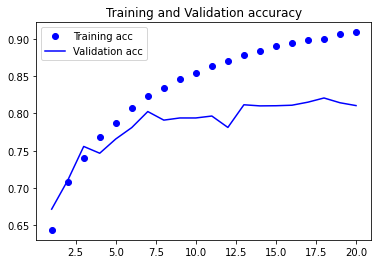

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

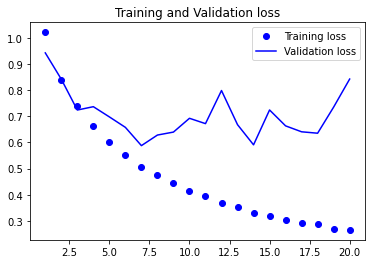

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()